<a href="https://colab.research.google.com/github/MR-Sambit/Crop-_Disease_Detection__v3.0/blob/main/CDD_v3_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sambithaldar","key":"af73bc192c50397ec31603ecd08f79ec"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle (1).json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle (1).json
!kaggle datasets download -d emmarex/plantdisease
!unzip plantdisease.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle (1).json ~/.kaggle/'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 ~/.kaggle/kaggle (1).json'
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
plantdisease.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  plantdisease.zip
replace PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Define paths
train_dir = '/content/PlantVillage'  # Update this path if needed

# Image preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2,  # Split data into training and validation
    rotation_range=20,  # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           7,695 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,946,511 (49.39 MB)

 Trainable params: 12,946,511 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 107s 196ms/step - accuracy: 0.3299 - loss: 2.0698 - val_accuracy: 0.6465 - val_loss: 1.0566
Epoch 2/10
  1/516 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.5312 - loss: 1.2478

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.5312 - loss: 1.2478 - val_accuracy: 0.6250 - val_loss: 1.1139
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 140s 244ms/step - accuracy: 0.6392 - loss: 1.0654 - val_accuracy: 0.7739 - val_loss: 0.6559
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.7812 - loss: 0.7342 - val_accuracy: 0.7747 - val_loss: 0.6571
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 158s 194ms/step - accuracy: 0.7235 - loss: 0.8300 - val_accuracy: 0.7998 - val_loss: 0.5844
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.7188 - loss: 0.9425 - val_accuracy: 0.8054 - val_loss: 0.5506
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 143s 231ms/step - accuracy: 0.7816 - loss: 0.6482 - val_accuracy: 0.8330 - val_loss: 0.5069
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9375 - loss: 0.5041 - val_accuracy: 0.8057 - val_loss: 0.5745
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 98s 189ms/step - accuracy: 0.8082 - loss: 0.5786 - val_

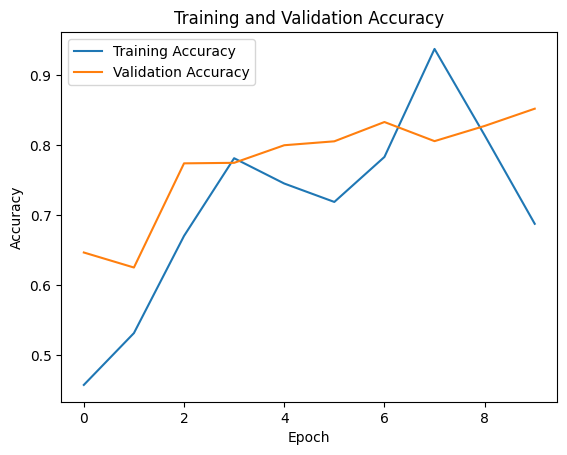

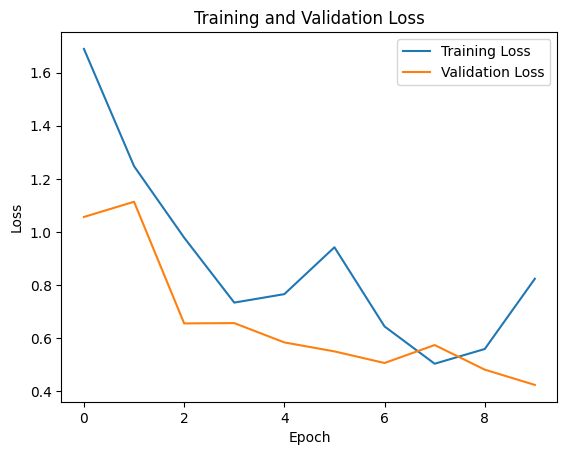

In [9]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
model.save('plant_disease_model.h5')

In [ ]:
# prompt: WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.

model.save('plant_disease_model.keras')


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/Pepper-Rot.jpg'  # Replace with your test image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map class index to label
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
Predicted Class: Pepper__bell___Bacterial_spot


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/Pepper-Rot.jpg'  # Replace with your test image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
confidence_score = np.max(predictions) * 100  # Get confidence percentage

# Map class index to label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

# Assuming class labels are in format "Plant___Disease" (e.g., "Tomato___Blight")
plant, disease = predicted_label.split("___")  # Changed delimiter to '___'

# Print detailed output
print(f"Identified Plant: {plant}")
print(f"Detected Disease: {disease}")
print(f"Confidence Score: {confidence_score:.2f}%")

# Optional: Show all class probabilities
print("\nClass Probabilities:")
for i, label in enumerate(class_labels):
    print(f"{label}: {predictions[0][i] * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Identified Plant: Pepper__bell
Detected Disease: Bacterial_spot
Confidence Score: 97.04%

Class Probabilities:
Pepper__bell___Bacterial_spot: 97.04%
Pepper__bell___healthy: 0.06%
Potato___Early_blight: 0.75%
Potato___Late_blight: 0.00%
Potato___healthy: 0.00%
Tomato_Bacterial_spot: 0.00%
Tomato_Early_blight: 1.99%
Tomato_Late_blight: 0.09%
Tomato_Leaf_Mold: 0.00%
Tomato_Septoria_leaf_spot: 0.06%
Tomato_Spider_mites_Two_spotted_spider_mite: 0.00%
Tomato__Target_Spot: 0.00%
Tomato__Tomato_YellowLeaf__Curl_Virus: 0.00%
Tomato__Tomato_mosaic_virus: 0.00%
Tomato_healthy: 0.00%


In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/Pepper-Rot.jpg'  # Replace with your test image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
confidence_score = np.max(predictions) * 100  # Get confidence percentage

# Map class index to label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

# Assuming class labels are in format "Plant-Disease" (e.g., "Tomato-Bacterial_spot")
plant, disease = predicted_label.split("___")

# Print detailed output
print(f"Identified Plant: {plant}")
print(f"Detected Disease: {disease}")
print(f"Confidence Score: {confidence_score:.2f}%")

# Optional: Show all class probabilities
print("\nClass Probabilities:")
for i, label in enumerate(class_labels):
    print(f"{label}: {predictions[0][i] * 100:.2f}%")

# Final confirmation statement
print(f"\nAccording to our Confidence Score, the disease is: {disease}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Identified Plant: Pepper__bell
Detected Disease: Bacterial_spot
Confidence Score: 97.04%

Class Probabilities:
Pepper__bell___Bacterial_spot: 97.04%
Pepper__bell___healthy: 0.06%
Potato___Early_blight: 0.75%
Potato___Late_blight: 0.00%
Potato___healthy: 0.00%
Tomato_Bacterial_spot: 0.00%
Tomato_Early_blight: 1.99%
Tomato_Late_blight: 0.09%
Tomato_Leaf_Mold: 0.00%
Tomato_Septoria_leaf_spot: 0.06%
Tomato_Spider_mites_Two_spotted_spider_mite: 0.00%
Tomato__Target_Spot: 0.00%
Tomato__Tomato_YellowLeaf__Curl_Virus: 0.00%
Tomato__Tomato_mosaic_virus: 0.00%
Tomato_healthy: 0.00%

According to our Confidence Score, the disease is: Bacterial_spot
